# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [2]:
df = pd.read_csv('bank_fin.csv', sep = ';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0 $,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,"830,00 $",yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,"545,00 $",yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,"1,00 $",yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,NaN,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [4]:
df['balance'].isna().sum()   # balance = 25

25

### Задание 2

In [5]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [6]:
df['balance']

0         2 343,00 $ 
1            45,00 $ 
2         1 270,00 $ 
3         2 476,00 $ 
4           184,00 $ 
             ...     
11157         1,00 $ 
11158       733,00 $ 
11159        29,00 $ 
11160           0  $ 
11161           0  $ 
Name: balance, Length: 11162, dtype: object

### Задание 3

In [7]:
import numpy as np

def make_convert(row):
    row = str(row)
    if row != 'unknown':
        row = row.replace(',00', '')
        row = row.replace('$', '')
        row = row.replace(' ', '')
        return float(row)
    else:
        return np.nan

df['balance'] = df['balance'].apply(make_convert)

In [8]:
df['balance'].mean()

1529.1290293615875

### Задание 4

In [9]:
df['balance'] = df['balance'].fillna(df['balance'].median())

In [10]:
df['balance'].mean()

1526.9360329690019

### Задание 5

In [11]:
#df['job'].value_counts()

In [12]:
m_job = df['job'].mode()[0]
m_edu = df['education'].mode()[0]

df['job'] = df['job'].apply(lambda x: m_job if x == 'unknown' else x)
df['education'] = df['education'].apply(lambda x: m_edu if x == 'unknown' else x)

In [13]:
df_new = df[(df['job'] == 'management') & (df['education'] == 'secondary')]
df_new['balance'].mean()

1598.8829787234042

### Задание 6

In [14]:
q1 = df.balance.quantile(0.25)  # 25-й перцентиль
q3 = df.balance.quantile(0.75)  # 75-й перцентиль
iqr = q3 - q1                         # межквартильный размах
lower_bound = q1 - (iqr*1.5)          # нижняя граница выбросов
upper_bound = q3 + (iqr*1.5)          # верхняя граница выбросов
 
print('25-й перцентиль: {},'.format(q1),
      '75-й перцентиль: {},'.format(q3),
      "IQR: {}, ".format(iqr),
      "Границы выбросов: [{lb}, {ub}].".format(lb=lower_bound, ub=upper_bound))

25-й перцентиль: 123.0, 75-й перцентиль: 1699.0, IQR: 1576.0,  Границы выбросов: [-2241.0, 4063.0].


In [15]:
# df_nb = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]
df_nb = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

In [16]:
df_nb.shape

(10105, 17)

In [17]:
print(df_nb['balance'].describe())

count    10105.000000
mean       807.653538
std        994.151966
min      -2049.000000
25%         95.000000
50%        445.000000
75%       1227.000000
max       4063.000000
Name: balance, dtype: float64


In [18]:
q_1 = df['balance'].quantile(0.25)
q_3 = df['balance'].quantile(0.75)

iqr = q_3 - q_1

lower_bound = q_1 - 1.5*iqr
upper_bound = q_3 + 1.5*iqr

df_cleaned = df[(df['balance'] >= lower_bound)&(df['balance'] <= upper_bound)]

print(lower_bound)

-2241.0


## Часть 2:  Разведывательный анализ

### Задание 1

In [19]:
df = df_nb

df['deposit'].value_counts()

no     5424
yes    4681
Name: deposit, dtype: int64

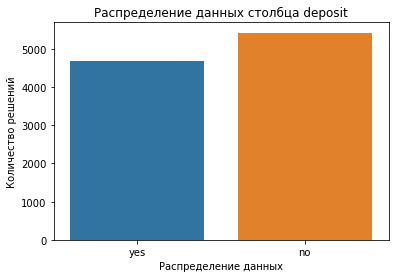

In [20]:
import seaborn as sns
 
gfg = sns.countplot(df['deposit'])

gfg.set_title('Распределение данных столбца deposit')
gfg.set_xlabel('Распределение данных')
gfg.set_ylabel('Количество решений')
plt.show()

### Задание 2

In [21]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


### Задание 3

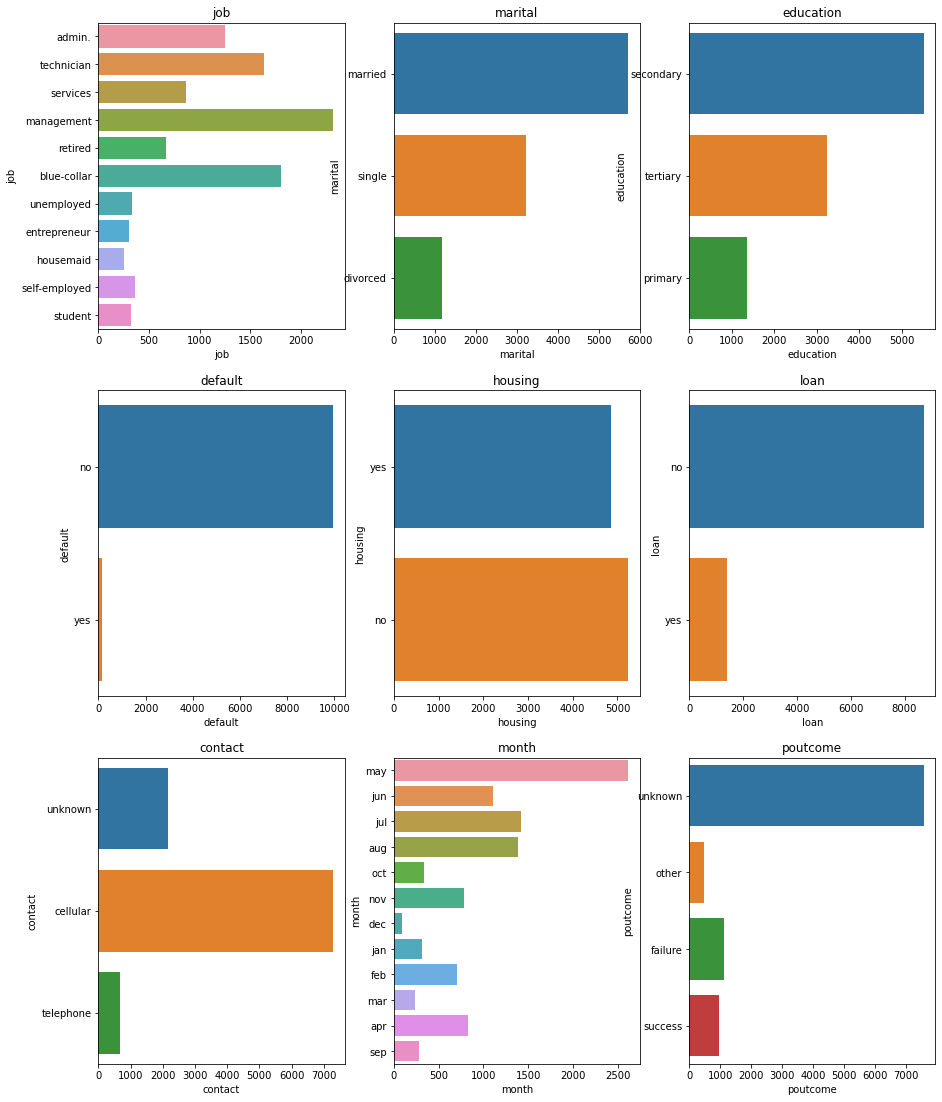

In [22]:
df.describe(include = 'object')
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
import matplotlib.pyplot as plt
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

### Задание 4

<AxesSubplot:xlabel='poutcome'>

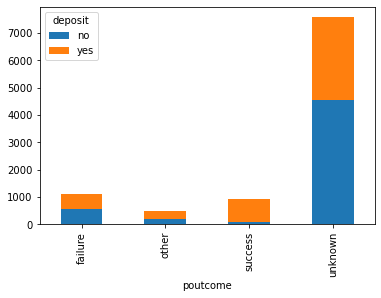

In [23]:
types = df.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

### Задание 5

In [24]:
for i in np.unique(df.month):
    print(i, df[(df.month == i)&(df.deposit == 'no')].shape[0]/df[(df.month == i)].shape[0])

apr 0.3819277108433735
aug 0.5595667870036101
dec 0.0967741935483871
feb 0.45557122708039494
jan 0.6081504702194357
jul 0.5895627644569816
jun 0.5489130434782609
mar 0.10126582278481013
may 0.6786396637371036
nov 0.5846153846153846
oct 0.18507462686567164
sep 0.16546762589928057


In [25]:
res_n = df[df.deposit == 'no'].groupby(['month'])['deposit'].count()

In [26]:
res_k = df.groupby(['month'])['deposit'].count()

res_n/res_k

month
apr    0.381928
aug    0.559567
dec    0.096774
feb    0.455571
jan    0.608150
jul    0.589563
jun    0.548913
mar    0.101266
may    0.678640
nov    0.584615
oct    0.185075
sep    0.165468
Name: deposit, dtype: float64

### Задание 6

<AxesSubplot:xlabel='age_group', ylabel='count'>

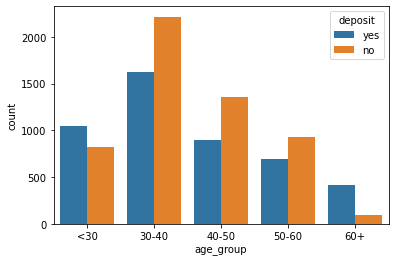

In [27]:
df['age_group'] = pd.cut(df.age, [0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])
sns.countplot(x="age_group", hue="deposit", data=df)

### Задание 7

<AxesSubplot:xlabel='count', ylabel='marital'>

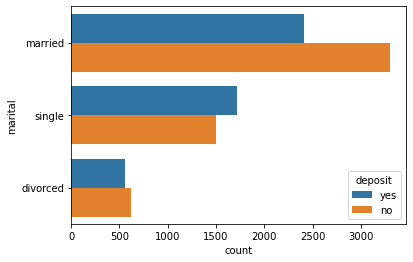

In [28]:
sns.countplot(y='marital', hue='deposit', data=df)

<AxesSubplot:xlabel='count', ylabel='education'>

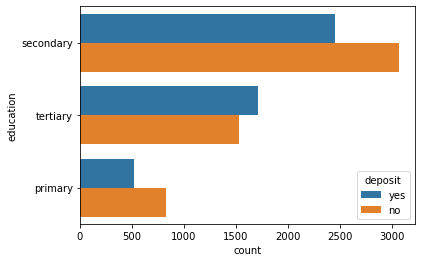

In [29]:
sns.countplot(y='education', hue='deposit', data=df)

<AxesSubplot:xlabel='count', ylabel='job'>

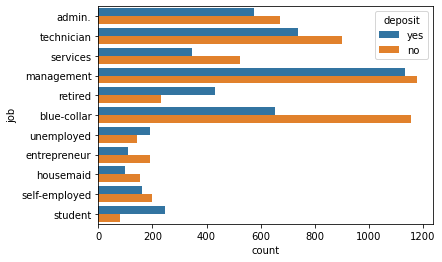

In [30]:
sns.countplot(y='job', hue='deposit', data=df)

### Задание 8

In [31]:
bank1 = df[df.deposit == 'yes'][['education','marital','deposit']]
bank2 = df[df.deposit == 'no'][['education','marital','deposit']] 
res1 = pd.crosstab(bank1['education'],bank1['marital'])
res2 = pd.crosstab(bank2['education'],bank2['marital'])
print(res1)
print(res2)

marital    divorced  married  single
education                           
primary          96      339      82
secondary       283     1289     879
tertiary        174      784     755
marital    divorced  married  single
education                           
primary          91      641     100
secondary       370     1830     866
tertiary        163      832     531


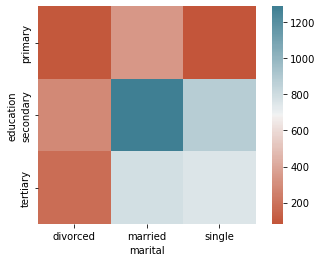

In [32]:
ax = sns.heatmap(
    res1, 
    #vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)

## Часть 3: преобразование данных

### Задание 1

In [33]:
# Создание экземпляра класса LabelEncoder()
lab_enc = LabelEncoder()

# Кодирование признака
df['education'] = lab_enc.fit_transform(df['education'])

In [34]:
df['education'].sum()

11995

In [35]:
df["age_group"]

0        50-60
1        50-60
2        40-50
3        50-60
4        50-60
         ...  
11157    30-40
11158    30-40
11159    30-40
11160    40-50
11161    30-40
Name: age_group, Length: 10105, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

### Задание 2

In [36]:
le = LabelEncoder()
df["age_group"] = le.fit_transform(df["age_group"])

In [37]:
df["age_group"]

0        2
1        2
2        1
3        2
4        2
        ..
11157    0
11158    0
11159    0
11160    1
11161    0
Name: age_group, Length: 10105, dtype: int32

In [38]:
def bin_func(row):
    if row == 'yes':
        return 1
    else:
        return 0

df['deposit'] = df['deposit'].apply(bin_func)

In [39]:
df['deposit'].std()

0.4986712532451993

In [40]:
df['default'] = df['default'].apply(bin_func)
df['housing'] = df['housing'].apply(bin_func)
df['loan'] = df['loan'].apply(bin_func)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,1,0,2343.0,1,0,unknown,5,may,1042,1,-1,0,unknown,1,2
1,56,admin.,married,1,0,45.0,0,0,unknown,5,may,1467,1,-1,0,unknown,1,2
2,41,technician,married,1,0,1270.0,1,0,unknown,5,may,1389,1,-1,0,unknown,1,1
3,55,services,married,1,0,2476.0,1,0,unknown,5,may,579,1,-1,0,unknown,1,2
4,54,admin.,married,2,0,184.0,0,0,unknown,5,may,673,2,-1,0,unknown,1,2


In [41]:
# на грязном датасете (до чистки выбросов) ответ 0.619, который принимает система

res = df['default'].mean() + df['housing'].mean() + df['loan'].mean()
res

0.6354280059376547

### Задание 3

In [42]:
'''
dum_list = ['job', 'marital', 'contact', 'month', 'poutcome']
df = pd.get_dummies(df, columns=dum_list, prefix=dum_list)
'''

categorial_features = ['job', 'marital', 'contact', 'month', 'poutcome']
df1= pd.get_dummies(df[categorial_features])
df = pd.concat([df,df1], axis = 1)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,admin.,married,1,0,2343.0,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
1,56,admin.,married,1,0,45.0,0,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
2,41,technician,married,1,0,1270.0,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
3,55,services,married,1,0,2476.0,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
4,54,admin.,married,2,0,184.0,0,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1


In [43]:
# Получается, что 'job', 'marital', 'contact', 'month', 'poutcome' удалены из исходного датафрейма
# Если сложить 46 + 5, то получим 51, где 'deposit' не в счёт. В итоге, правильный ответ 50.

### Задание 4

"\nax.set_xticklabels(\n    ax.get_xticklabels(),\n    rotation=45,\n    horizontalalignment='right'\n);\n"

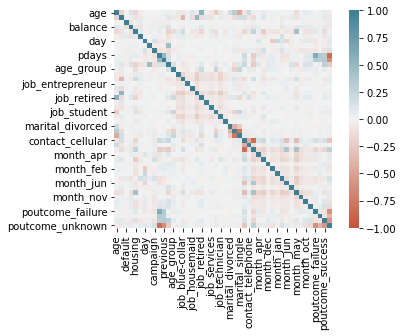

In [44]:
corr = df.corr()

#sns.set(rc={'figure.figsize':(10, 10)})

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)

'''
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
'''

In [45]:
new_corr = corr['deposit'].reset_index()
sort_corr = new_corr.sort_values('deposit', ascending=False)
sort_corr.head()

,index,deposit
11,deposit,1.000000
7,duration,0.457818
44,poutcome_success,0.288491
27,contact_cellular,0.223944
9,pdays,0.147917


In [46]:
#corr.to_excel("corr.xlsx")

df['age'].corr(df['age_group'], method = 'pearson') #  kendall spearman

-0.008358618363919311

In [47]:
df[['age_group','age']]

,age_group,age
0,2,59
1,2,56
2,1,41
3,2,55
4,2,54
...,...,...
11157,0,33
11158,0,39
11159,0,32
11160,1,43


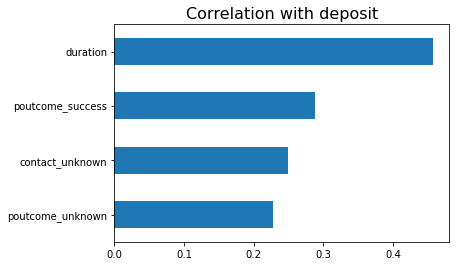

In [48]:
corr["deposit"].apply(lambda x: abs(x)).sort_values()[-5:-1].plot.barh()
plt.title("Correlation with deposit", fontsize = 16)
plt.show()

### Задание 5

In [49]:
df = df.drop(['job', 'marital', 'contact', 'month', 'poutcome'], axis=1)

In [50]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [51]:
print(y_test.shape)
print(y_test.mean())

(3335,)
0.46326836581709147


In [52]:
df.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,0,2343.0,1,0,5,1042,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,56,1,0,45.0,0,0,5,1467,1,-1,...,0,0,1,0,0,0,0,0,0,1
2,41,1,0,1270.0,1,0,5,1389,1,-1,...,0,0,1,0,0,0,0,0,0,1
3,55,1,0,2476.0,1,0,5,579,1,-1,...,0,0,1,0,0,0,0,0,0,1
4,54,2,0,184.0,0,0,5,673,2,-1,...,0,0,1,0,0,0,0,0,0,1


### Задание 6

In [53]:
# 1 вариант от SF 
from sklearn.feature_selection import SelectKBest, f_classif
select_k_best_classifier = SelectKBest(score_func=f_classif, k=15).fit(X_train, y_train)
select_k_best_classifier.get_support()
feature_names = list(X_train.columns.values)
mask = select_k_best_classifier.get_support()
new_features = []

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
new_features

['balance',
 'housing',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'age_group',
 'contact_cellular',
 'contact_unknown',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'poutcome_success',
 'poutcome_unknown']

In [54]:
# 2 вариант через compress 
from itertools import compress

skb = SelectKBest(f_classif, k=15).fit(X_train, y_train)
mask = skb.get_support()
name_col = X_train.columns.values

list(compress(name_col, mask))

['balance',
 'housing',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'age_group',
 'contact_cellular',
 'contact_unknown',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'poutcome_success',
 'poutcome_unknown']

### Задание 7

In [55]:
df = df[['balance', 'housing', 'duration', 'campaign', 'pdays', 
         'previous', 'age_group', 'contact_cellular', 'contact_unknown',
         'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_success', 'poutcome_unknown', 'deposit']]

X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [56]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_test_scaled[:, 0].mean())  # для признака balance

0.46823674223097866


In [57]:
len(X_test_scaled)

3335

In [58]:
df.head()

,balance,housing,duration,campaign,pdays,previous,age_group,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown,deposit
0,2343.0,1,1042,1,-1,0,2,0,1,0,1,0,0,0,1,1
1,45.0,0,1467,1,-1,0,2,0,1,0,1,0,0,0,1,1
2,1270.0,1,1389,1,-1,0,1,0,1,0,1,0,0,0,1,1
3,2476.0,1,579,1,-1,0,2,0,1,0,1,0,0,0,1,1
4,184.0,0,673,2,-1,0,2,0,1,0,1,0,0,0,1,1


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [59]:
log_reg = linear_model.LogisticRegression(
    solver='sag', random_state=42, max_iter=1000 )

log_reg.fit(X_train_scaled, y_train)
y_train_pred = log_reg.predict(X_train_scaled)

print(metrics.classification_report(y_train, y_train_pred))

y_test_pred = log_reg.predict(X_test_scaled)

print(metrics.classification_report(y_test, y_test_pred))
print('Test accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      3634
           1       0.84      0.76      0.80      3136

    accuracy                           0.82      6770
   macro avg       0.83      0.82      0.82      6770
weighted avg       0.83      0.82      0.82      6770

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.74      0.78      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.80      0.81      3335
weighted avg       0.81      0.81      0.81      3335

Test accuracy: 0.81


In [60]:
# accuracy = 0.81

### Задание 2

In [61]:
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth = 6
)
dt.fit(X_train_scaled, y_train)
y_train_pred = dt.predict(X_train_scaled)

print('Train: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))

y_test_pred = dt.predict(X_test_scaled)

print('Test: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Train: 0.82
Test: 0.81


In [62]:
# accuracy = 0.81

### Задание 3

In [63]:
from sklearn.model_selection import GridSearchCV
parameters =  {'min_samples_split': [2, 5, 7, 10], 'max_depth':[3,5,7]}
model_cv = GridSearchCV(tree.DecisionTreeClassifier(), parameters,
 cv=3, scoring=('f1'), return_train_score=True)
model_cv.fit(X_train_scaled, y_train)

print("Наилучшие значения параметров: {}".format(model_cv.best_params_))

y_test_pred = model_cv.predict(X_test_scaled)

print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Наилучшие значения параметров: {'max_depth': 7, 'min_samples_split': 5}
f1_score на тестовом наборе: 0.80


In [64]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1790
           1       0.79      0.81      0.80      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.81      0.81      0.81      3335



In [65]:
# f1_score = 0.79

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [66]:
rf = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)
#Обучаем модель
rf.fit(X_train_scaled, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train_scaled)
print('Train: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test_scaled)
print('Test accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print()
print('Train: {:.2f}'.format(metrics.recall_score(y_train, y_train_pred)))
print('Test recall: {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))

Train: 0.86
Test accuracy: 0.83

Train: 0.86
Test recall: 0.83


In [67]:
# accuracy = 0.83
# recall =  0.84

### Задание 2

In [68]:
gb = ensemble.GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)
gb.fit(X_train_scaled, y_train)

y_train_pred = gb.predict(X_train_scaled)

print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))

y_test_pred = gb.predict(X_test_scaled)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.88
Test: 0.82


In [69]:
# f1_score = 0.82

### Задание3

In [70]:
estimators = [
    ('dt', tree.DecisionTreeClassifier(
        criterion='entropy',
        min_samples_leaf=5,
        max_depth=6,
        random_state=42
        )
    ),
    ('log_reg', linear_model.LogisticRegression(
        solver='sag',
        random_state=42 
        )
    ),
    ('gb', ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        n_estimators=300,
        min_samples_leaf=5,
        max_depth=5,
        random_state=42
        )
    )
]

stack = ensemble.StackingClassifier(
    estimators,
    final_estimator=linear_model.LogisticRegression(random_state=42)
)
stack.fit(X_train_scaled, y_train)

y_train_pred = stack.predict(X_train_scaled)
#print('Train: {:.2f}'.format(metrics.precision(y_train, y_train_pred)))
y_test_pred = stack.predict(X_test_scaled)
#print('Test: {:.2f}'.format(metrics.precision(y_test, y_test_pred)))

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1790
           1       0.81      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



In [71]:
# precision = 0.82

In [72]:
estimators = [
('dtc', tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=6)),
('rf', ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)),
('gb', ensemble.GradientBoostingClassifier(min_samples_leaf=5, learning_rate=0.05, n_estimators=300, max_depth=5, random_state=42))
]
#Создаем объект класса стекинг
reg = ensemble.StackingClassifier(
    estimators=estimators,
    final_estimator=linear_model.LogisticRegression(random_state=42))

#Обучаем модель
reg.fit(X_train_scaled, y_train)

# Выводим значения метрики
y_train_pred = reg.predict(X_train_scaled)
print('F1 Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = reg.predict(X_test_scaled)
print('F1 Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

F1 Train: 0.86
F1 Test: 0.81


### Задание 4

Feature: 0, Score: 0.05795
Feature: 1, Score: 0.04773
Feature: 2, Score: 0.50711
Feature: 3, Score: 0.01478
Feature: 4, Score: 0.05507
Feature: 5, Score: 0.00847
Feature: 6, Score: 0.03990
Feature: 7, Score: 0.00362
Feature: 8, Score: 0.07258
Feature: 9, Score: 0.02782
Feature: 10, Score: 0.01521
Feature: 11, Score: 0.01988
Feature: 12, Score: 0.01353
Feature: 13, Score: 0.11496
Feature: 14, Score: 0.00139


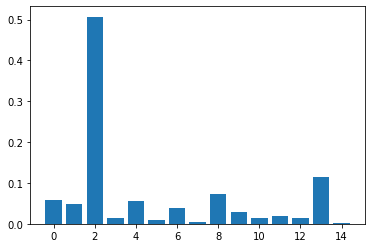

In [73]:
import matplotlib.pyplot  as plt
importance = gb.feature_importances_
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Задание 5

In [74]:
#!pip install optuna

In [75]:
import optuna

def optuna_rf(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

study = optuna.create_study()

study.optimize(optuna_rf, n_trials=20)
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42, )
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)

print("accuracy на тестовом наборе: {:.3f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))


[I 2022-08-22 23:03:21,216] A new study created in memory with name: no-name-e95301c6-b6cd-497a-82a7-b35feca92502
[I 2022-08-22 23:03:22,149] Trial 0 finished with value: 0.8456712672521959 and parameters: {'n_estimators': 179, 'max_depth': 24, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8456712672521959.
[I 2022-08-22 23:03:23,109] Trial 1 finished with value: 0.8523563488335683 and parameters: {'n_estimators': 179, 'max_depth': 12, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8456712672521959.
[I 2022-08-22 23:03:23,880] Trial 2 finished with value: 0.8621389539422326 and parameters: {'n_estimators': 138, 'max_depth': 16, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8456712672521959.
[I 2022-08-22 23:03:24,823] Trial 3 finished with value: 0.865979381443299 and parameters: {'n_estimators': 166, 'max_depth': 22, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8456712672521959.
[I 2022-08-22 23:03:25,639] Trial 4 finished with value: 0.849242305889704

accuracy на тестовом наборе: 0.821
f1_score на тестовом наборе: 0.810


In [76]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42
                                          )
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))
  return score

study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
study.optimize(optuna_rf, n_trials=20)

'''
study = optuna.create_study()
study.optimize(optuna_rf, n_trials=10)
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42, )
model.fit(X_train_scaled, y_train)
'''

[I 2022-08-22 23:03:40,711] A new study created in memory with name: RandomForestClassifier
[I 2022-08-22 23:03:41,710] Trial 0 finished with value: 0.9231011165277558 and parameters: {'n_estimators': 136, 'max_depth': 24, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9231011165277558.
[I 2022-08-22 23:03:42,830] Trial 1 finished with value: 0.9034081985236375 and parameters: {'n_estimators': 148, 'max_depth': 16, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9231011165277558.
[I 2022-08-22 23:03:43,579] Trial 2 finished with value: 0.8471397311659894 and parameters: {'n_estimators': 142, 'max_depth': 13, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9231011165277558.
[I 2022-08-22 23:03:44,580] Trial 3 finished with value: 0.8868721639805978 and parameters: {'n_estimators': 157, 'max_depth': 17, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9231011165277558.
[I 2022-08-22 23:03:45,372] Trial 4 finished with value: 0.8800374882849109 and parameters: {'n_

'\nstudy = optuna.create_study()\nstudy.optimize(optuna_rf, n_trials=10)\nmodel = ensemble.RandomForestClassifier(**study.best_params,random_state=42, )\nmodel.fit(X_train_scaled, y_train)\n'

In [77]:
# accuracy = 0.84
# f1_score = 0.83